# Vertical analzsis of Temperature T, Relative Humidity RH and their changes DT and DRH

For the T and RH Plots the used timeframe is from 2010-2020,

For the DT and DRH Plots the difference between the period 2010-2020 and 1980-1990 is  displayed.


In [1]:
import os


# load stuff:
from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

#import cartopy.crs as ccrs

from xhistogram.xarray import histogram

In [2]:
#load Datasets
#SETNAME="MERRA2"
SETNAME="JRA-55"
#Global Params

if SETNAME=="MERRA2":
    FILES="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_PS,RH,T/MERRA2_*"
    RESLOC = '../Results/'
    RESLOC_SPECIFIC = 'MERRA2_RH/'
    DATALOC_SPECIFIC = '/MERRA2_instM_3d_asm_Np_PS,RH,T/'
    DATALOC = '../../../../../../work/mh0066/m301053/Data' + DATALOC_SPECIFIC
    
elif SETNAME=="JRA-55":
    FILES="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric/anl*"
    RESLOC = '../VerticalAnalysis/'
    RESLOC_SPECIFIC = ''
    DATALOC_SPECIFIC = '/JRA-55_Monthly_1.25_Deg_isobaric/'
    DATALOC = '../../../../../../work/mh0066/m301053/Data' + DATALOC_SPECIFIC
else:
    raise Exception("Sorry, notexisting Setname")

INT_RES_Specific = SETNAME + '/'
INT_RES='../Interim_Results/VerticalAnalysis_LandOcean/' + INT_RES_Specific
#What parts of the Notebook should run?
TOPOANALYSIS=True

MASKELEVATION=True
SURFACEVALUES=True


t1_start='1980-01-01'
t1_end='1989-12-01'
t2_start='2010-01-01'
t2_end='2019-12-01'

print(os.path.isdir(INT_RES))

True


In [3]:
DS = Dataset(files=FILES, setname = SETNAME, dataloc = DATALOC)

Loading full dataset JRA-55
[########################################] | 100% Completed | 22.40 s
<xarray.Dataset>
Dimensions:  (time: 504, lon: 288, lat: 145, p: 37)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 7.0 5.0 3.0 2.0 1.0
Data variables:
    RH       (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
    T        (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jul 03 15:11:16 2023: cdo -f nc --eccodes copy anl_p125...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...


In [4]:
if MASKELEVATION==True:
    DS_2D = Dataset(files='../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface/*pres.nc', setname = 'JRA-55_2D', dataloc = '../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface/')
    DS.ds = elevation2nan( DS.ds, DS_2D.ds )
    print(DS.ds)

Loading full dataset JRA-55_2D
[########################################] | 100% Completed | 805.83 ms
<xarray.Dataset>
Dimensions:  (time: 480, lon: 288, lat: 145)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    SP       (time, lat, lon) float32 dask.array<chunksize=(480, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jul 11 15:58:11 2023: cdo -f nc --eccodes copy anl_surf...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
<xarray.Dataset>
Dimensions:  (time: 480, p: 37, lat: 145, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -17

In [5]:
# =======================================================================
#Initilize topography analysis
if TOPOANALYSIS==True:
    TOPO = Dataset(files="../../../../../../work/mh0066/m301053/Data/Topo/topo_r720x360.nc", setname = 'TOPO', dataloc = '../../../../../../work/mh0066/m301053/Data/Topo/')
    TOPO.land_mask = xr.where(TOPO.ds.topo >= 0.0, True, False)
    
    # Reindex the land mask to match the climate data grid
    TOPO.land_mask_reindexed = TOPO.land_mask.reindex_like(DS.ds, method='nearest')
    print(TOPO.land_mask_reindexed)
    #TOPO.ds.where(TOPO.land_mask_reindexed==False).topo.plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_elevation,cbar_kwargs= cbar_kwargs) for ocean


Loading full dataset TOPO
[########################################] | 100% Completed | 101.45 ms
<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    topo     (lat, lon) float32 dask.array<chunksize=(360, 720), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 05 16:46:47 2023: cdo -f nc topo,r720x360 topo_r720...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...
<xarray.DataArray 'topo' (lat: 145, lon: 288)>
dask.array<getitem, shape=(145, 288), dtype=bool, chunksize=(145, 288), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.7

In [43]:
# =======================================================================
#A nice Plot function
#plt.rcParams['axes.grid'] = True

def update_norm(vmin,vmax,vcentner=0):
    global norm
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcentner, vmax=vmax)


def startfig(title):

    cols = ['Mask {}'.format(col) for col in ['Land','Ocean']]
    rows = ['{}'.format(row) for row in ['P-space', 'T-Space']]

    fig, axes = plt.subplots(nrows=2, ncols=2, 
                             figsize=(9,6),
                             sharex=True, sharey=True,
                             constrained_layout=True,
                            )

    plt.setp(axes.flat, xlabel='X-label', ylabel='Y-label')

    fig.suptitle(f'Vertical analysis ({title})',size='x-large',)

    pad = 5 # in points

    for ax, col in zip(axes[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                   )

    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center',
                   )
    
    
    
    
    return fig, axes
    
    
        
def endfig(fig, axes, name:str):
    
    
    cbar=fig.colorbar(artlist, ax=axes, location='right',ticks=np.linspace(vmin, vmax,21))
    #cbar.ax.set_yticklabels(np.linspace(vmin, vmax,10))
    
    # Enable Grid
    [ax.grid(True) for ax in axes.flat]
    #fig.tight_layout()
    #fig.subplots_adjust(left=0.15, top=0.95)
        
    plt.savefig(RESLOC+RESLOC_SPECIFIC+name,)#dpi=400
    
    plt.show()
    
    return





def save(data,name):  # redundant dont use
    data.to_netcdf(path=INT_RES+name)
    return

def plot_hist_RH(dsw,dss,i,j):
    
    dss=extract_below_temp_inv(dss).groupby('time.month').mean(("time"))
    dsw=extract_below_temp_inv(dsw).groupby('time.month').mean(("time"))

    hists = histogram(dss.lat.where(~np.isnan(dss.RH)),dss.T.where(~np.isnan(dss.RH)),  bins=[latbins, tbins])
    RH_hists = histogram(dss.lat.where(~np.isnan(dss.RH)),dss.T.where(~np.isnan(dss.RH)),  bins=[latbins, tbins], weights = dss.RH.where(~np.isnan(dss.RH)))
    histw = histogram(dsw.lat.where(~np.isnan(dsw.RH)),dsw.T.where(~np.isnan(dsw.RH)),  bins=[latbins, tbins])
    RH_histw = histogram(dsw.lat.where(~np.isnan(dsw.RH)),dsw.T.where(~np.isnan(dsw.RH)),  bins=[latbins, tbins], weights = dsw.RH.where(~np.isnan(dsw.RH)))

    RH_hist=-RH_hists/hists+RH_histw/histw
        
    global artlist
    artlist=  RH_hist.T.plot(ax=axes[i,j],yincrease=False,norm=norm, levels=levels,cmap=cmap,add_colorbar =False,)
    
    
    
    print(f"Done with axes[{i},{j}]")
    #return RH_hist

def plot_RH(dss,dsw,i,j):
    ds=dss.mean(("time","lon"))-dsw.mean(("time","lon"))
        
    
    ds.RH.plot(ax=axes[i,j],yincrease=False,norm=norm, levels=levels, x='lat',y='p',cmap=cmap,add_colorbar =False,)
    
    print(f"Done with axes[{i},{j}]")
    #return ds


In [39]:
# =======================================================================
# Parameter

t1=t1_start
t2=t1_end


levels=30

#

Ocean=True
Land=False

ONDJFM=[10,11,12,1,2,3]
AMJJAS=[4,5,6,7,8,9]



In [40]:

latbins = np.arange(-90,90,3)
tbins = np.arange(-80,30 , 10)


## Plots for RH

In [41]:
# =======================================================================
# Parameter fuer RH Plot

vmin=-0.3
vmax=0.3
levels=30
cmap=cmap_RH_change_gray
update_norm(vmin,vmax,0)


ocean=DS.ds.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)
land=DS.ds.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True)

lw=land.sel(time=ocean.time.dt.month.isin(ONDJFM))
ls=land.sel(time=ocean.time.dt.month.isin(AMJJAS))
ow=ocean.sel(time=ocean.time.dt.month.isin(ONDJFM))
os=ocean.sel(time=ocean.time.dt.month.isin(AMJJAS))

Done with axes[0,0]
Done with axes[0,1]
[########################################] | 100% Completed | 1.98 sms
[########################################] | 100% Completed | 1.93 sms
Done with axes[1,0]
[########################################] | 100% Completed | 2.47 sms
[########################################] | 100% Completed | 1.83 sms
Done with axes[1,1]


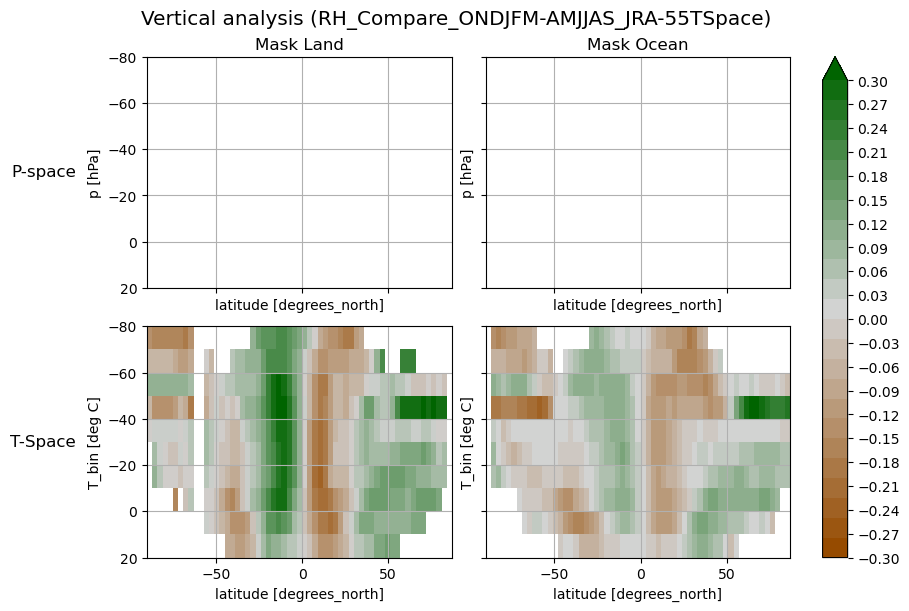

In [44]:
# =======================================================================
# Plot 

title='RH_Compare_ONDJFM-AMJJAS_'+SETNAME+"TSpace"
fig, axes = startfig(title)

plot_RH(lw,ls,0,0)#.to_netcdf(path=INT_RES+title+'_lw,ls.nc')
plot_RH(ow,os,0,1)#.to_netcdf(path=INT_RES+title+'_ow,os.nc')

plot_hist_RH(lw,ls,1,0)#.to_netcdf(path=INT_RES+title+'__lw,ls.nc')
plot_hist_RH(ow,os,1,1)#.to_netcdf(path=INT_RES+title+'_ow,os.nc')


endfig(fig,axes,title)